Exploratory Data Analysis (EDA) for the synthetic fraud‑detection dataset.

This script reads a CSV file produced by `generate_data.py` and computes basic
summary statistics.  It also creates simple visualisations to help
understand the relationships between the features and the multiple target
variables.  All plots are created with matplotlib and saved to a
`plots/` subdirectory relative to the working directory.

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/transactions.csv")

In [3]:
# Display basic information
print("Data dimensions:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())


Data dimensions: (10000, 24)

Column types:
 feature_0           float64
feature_1           float64
feature_2           float64
feature_3           float64
feature_4           float64
feature_5           float64
feature_6           float64
feature_7           float64
feature_8           float64
feature_9           float64
feature_10          float64
feature_11          float64
feature_12          float64
feature_13          float64
feature_14          float64
feature_15          float64
feature_16          float64
feature_17          float64
feature_18          float64
feature_19          float64
fraud_label           int64
chargeback_label      int64
takeover_label        int64
anomaly_score       float64
dtype: object

First 5 rows:
    feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.237785  -0.519981   2.422684   0.091915  -0.715406   2.471737   
1  -2.408454  -0.503653  -0.016669   0.255434  -0.654982   3.577860   
2  -2.869988   0.696136  -1.557528   2.4

In [4]:
# Summary statistics
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,fraud_label,chargeback_label,takeover_label,anomaly_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,-0.001672,0.010947,0.120891,-0.019807,-0.003777,0.583477,-0.008823,-0.863969,-0.485846,0.501203,...,-0.019157,-0.234024,-0.491594,0.022339,-0.003978,-0.514159,0.497500,0.546400,0.51430,0.306593
std,2.243878,0.992483,3.193827,2.118730,0.994357,3.517563,1.009468,2.692038,2.173830,2.032203,...,2.200008,3.703145,2.039219,0.997887,1.003221,1.773866,0.500019,0.497867,0.49982,0.145499
min,-9.446988,-3.701105,-13.195098,-7.758489,-3.563593,-15.237749,-3.657301,-12.080639,-9.474876,-7.265667,...,-7.627613,-12.529574,-10.280823,-3.794637,-3.999332,-7.105411,0.000000,0.000000,0.00000,0.000000
25%,-1.486559,-0.656105,-1.905418,-1.391771,-0.662431,-1.644158,-0.697305,-2.695893,-1.903066,-0.817771,...,-1.525196,-2.761345,-1.865450,-0.648979,-0.687293,-1.715331,0.000000,0.000000,0.00000,0.198935
50%,0.077356,0.013337,0.446492,0.181828,0.004644,0.647496,-0.008165,-0.902361,-0.504179,0.559205,...,-0.128542,-0.447005,-0.499868,0.012855,-0.010280,-0.534931,0.000000,1.000000,1.00000,0.287549
75%,1.559553,0.678717,2.407684,1.455429,0.661832,2.959071,0.670824,0.919519,0.938809,1.913052,...,1.426922,2.119560,0.874772,0.700780,0.673804,0.705054,1.000000,1.000000,1.00000,0.393014
max,8.230395,4.202026,10.084549,6.502530,3.599812,13.928030,3.617462,8.830247,7.886185,8.771908,...,9.303781,15.587987,6.962819,4.562115,3.766234,5.512850,1.000000,1.000000,1.00000,1.000000


In [5]:
    plots_dir = Path("../plots")
    plots_dir.mkdir(exist_ok=True)

In [6]:
# Correlation heatmap for all numeric variables
corr = df.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=False, #dont show corr values
    cmap="coolwarm",        
    xticklabels=corr.columns,
    yticklabels=corr.columns
)

plt.title("Correlation Matrix")
plt.xticks(rotation=90)
#plt.tight_layout()

# Save plot
heatmap_path = plots_dir / "correlation_heatmap.png"
plt.savefig(heatmap_path)
plt.close()

print(f"Correlation heatmap saved to {heatmap_path}")

Correlation heatmap saved to ../plots/correlation_heatmap.png


In [7]:
# Distribution of binary target variables to see if there is a class imbalance.
# if there is a significant class imbalance, I might need to implement smote or tomek links.
target_cols = [
    "fraud_label",
    "chargeback_label",
    "takeover_label",
]
for col in target_cols:
    counts = df[col].value_counts().sort_index()
    fig, ax = plt.subplots()
    ax.bar(counts.index.astype(str), counts.values)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    dist_path = plots_dir / f"{col}_distribution.png"
    plt.savefig(dist_path)
    plt.close(fig)
    print(f"Saved distribution plot for {col} to {dist_path}")

Saved distribution plot for fraud_label to ../plots/fraud_label_distribution.png
Saved distribution plot for chargeback_label to ../plots/chargeback_label_distribution.png
Saved distribution plot for takeover_label to ../plots/takeover_label_distribution.png


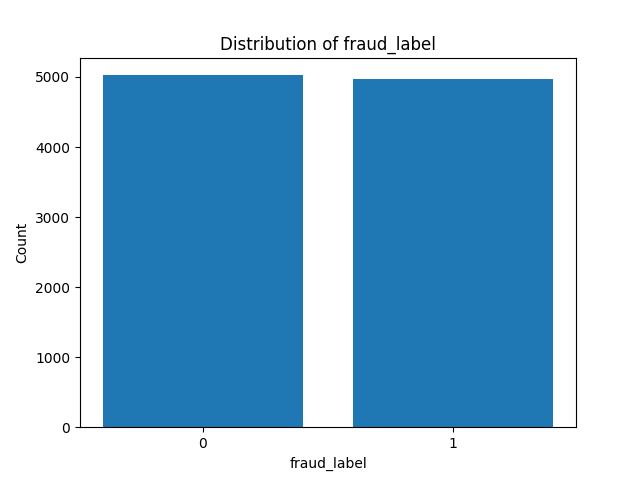
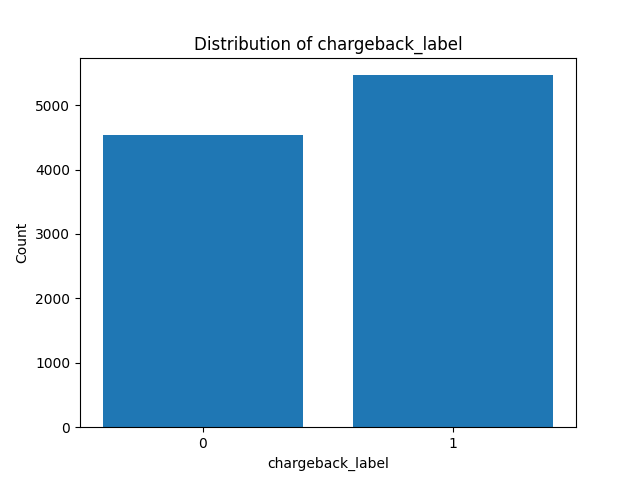
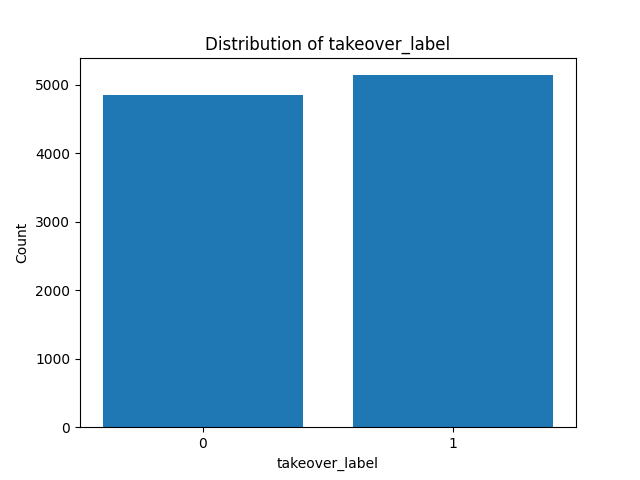

In [8]:
# Histogram for anomaly score
plt.figure(figsize=(8, 5))
sns.histplot(df["anomaly_score"], bins=30, kde=True)

plt.title("Distribution of anomaly_score")
plt.xlabel("anomaly_score")
plt.ylabel("Frequency")

anomaly_path = plots_dir / "anomaly_score_histogram.png"
plt.savefig(anomaly_path)
plt.close()

print(f"Saved histogram of anomaly_score to {anomaly_path}")

Saved histogram of anomaly_score to ../plots/anomaly_score_histogram.png


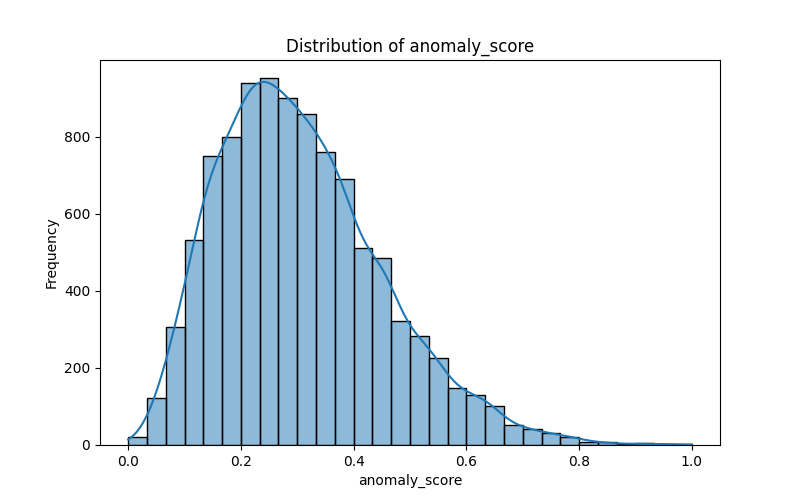